# Name : Tejas Dharmik

# Roll no. 15

# Topic : DRIVER DROWSINESS DETECTION USING ALARM SYSTEM

Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("3.png" , cv2.IMREAD_GRAYSCALE)

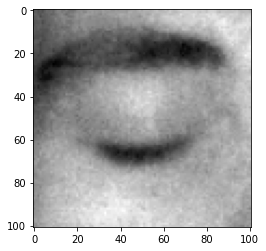

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(101, 101)

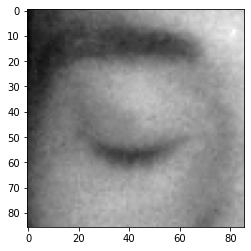

In [5]:
Datadirectory = 'train'
Classes = ['Closed_Eyes', 'Open_Eyes']

for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

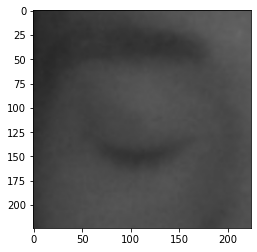

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass
   

In [9]:
create_training_data()

In [10]:
print(len(training_data))

4000


In [11]:
import random
random.shuffle(training_data)

Creating features and Labels

In [12]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X

array([[[[ 50,  50,  50],
         [ 50,  50,  50],
         [ 50,  50,  50],
         ...,
         [ 96,  96,  96],
         [ 96,  96,  96],
         [ 96,  96,  96]],

        [[ 50,  50,  50],
         [ 50,  50,  50],
         [ 50,  50,  50],
         ...,
         [ 96,  96,  96],
         [ 96,  96,  96],
         [ 96,  96,  96]],

        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 49,  49,  49],
         ...,
         [ 95,  95,  95],
         [ 95,  95,  95],
         [ 95,  95,  95]],

        ...,

        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 39,  39,  39],
         ...,
         [ 80,  80,  80],
         [ 79,  79,  79],
         [ 79,  79,  79]],

        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38],
         ...,
         [ 81,  81,  81],
         [ 80,  80,  80],
         [ 80,  80,  80]],

        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38],
         ...,
         [ 81,  81,  81],
        

In [13]:
X.shape

(4000, 224, 224, 3)

Converting values in the range of 0 to 1

In [14]:
X=X/255.0;
X

array([[[[0.19607843, 0.19607843, 0.19607843],
         [0.19607843, 0.19607843, 0.19607843],
         [0.19607843, 0.19607843, 0.19607843],
         ...,
         [0.37647059, 0.37647059, 0.37647059],
         [0.37647059, 0.37647059, 0.37647059],
         [0.37647059, 0.37647059, 0.37647059]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.19607843, 0.19607843, 0.19607843],
         [0.19607843, 0.19607843, 0.19607843],
         ...,
         [0.37647059, 0.37647059, 0.37647059],
         [0.37647059, 0.37647059, 0.37647059],
         [0.37647059, 0.37647059, 0.37647059]],

        [[0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686],
         ...,
         [0.37254902, 0.37254902, 0.37254902],
         [0.37254902, 0.37254902, 0.37254902],
         [0.37254902, 0.37254902, 0.37254902]],

        ...,

        [[0.14901961, 0.14901961, 0.14901961],
         [0.14901961, 0.14901961, 0.14901961]

In [15]:
Y=np.array(y)
Y

array([0, 1, 0, ..., 0, 0, 1])

# Model Training

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)


In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [26]:
new_model.fit(X,Y, epochs = 10, validation_split = 0.2)

Epoch 1/10
100/100 [==============================] - 69s 360ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 3.7747 - val_accuracy: 0.4925
Epoch 2/10
100/100 [==============================] - 35s 346ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 2.4899e-04 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 34s 343ms/step - loss: 7.5818e-04 - accuracy: 0.9997 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 4/10
100/100 [==============================] - 34s 336ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0513 - val_accuracy: 0.9887
Epoch 5/10
100/100 [==============================] - 34s 336ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1853 - val_accuracy: 0.9600
Epoch 6/10
100/100 [==============================] - 34s 344ms/step - loss: 0.0146 - accuracy: 0.9972 - val_loss: 3.3355e-05 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 34s 337ms/step - loss: 1.6113e-04 - accuracy: 1.0000 - val_loss:

In [27]:
new_model.save('mymodel.h5')

Prediction on images

For open eyes - 1         
For close eyes - 0

In [9]:
new_model = tf.keras.models.load_model('mymodel.h5')

In [10]:
img_array = cv2.imread('train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [11]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [12]:
X_input.shape

(1, 224, 224, 3)

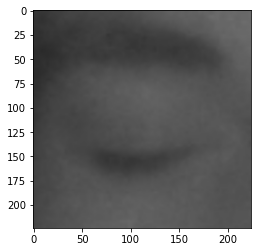

In [13]:
plt.imshow(new_array)

In [19]:
X_input = X_input/255.0

In [34]:
prediction = new_model.predict(X_input)
prediction

array([[5.260096e-07]], dtype=float32)

In [14]:
img_array = cv2.imread('4.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [15]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [22]:
X_input.shape

(1, 224, 224, 3)

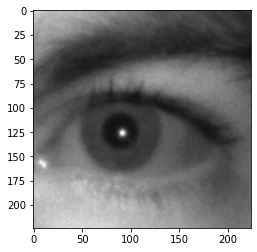

In [16]:
plt.imshow(new_array)

In [39]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[0.99999964]], dtype=float32)

# Prediction using Haarcascade Classifiers

In [17]:
img = cv2.imread("1.png")

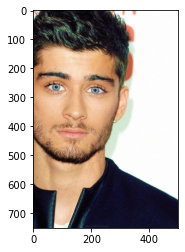

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Face Detection

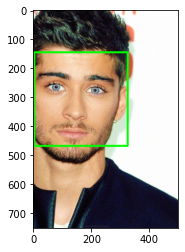

In [19]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Eye Detection

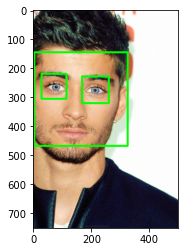

In [20]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img , (x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Cropping eye part

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) ==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex + ew]
            
    

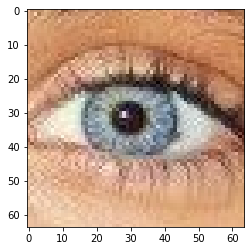

In [22]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [23]:
eyes_roi.shape

(64, 64, 3)

In [24]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [25]:
final_image.shape

(1, 224, 224, 3)

In [48]:
pred = new_model.predict(final_image)
print(pred)
if pred>0.9:
    print("Open Eyes")
else:
    print("Close Eyes")


[[0.96047014]]
Open Eyes


In [26]:
new_model = tf.keras.models.load_model('mymodel1.h5')

# Real Time Application using OpenCV

In [27]:
import cv2
# import winsound
from gtts import gTTS
from playsound import playsound
import copy
import imutils
# frequency = 2500
# duration = 1000
myText0 = "Welcome to Driver drowsiness Detection system, Please turn off your mobile phones and tie your sit belts before driving "
output0 = gTTS(text=myText0,lang='en',slow=False)
output0.save("OUTPUT.mp3")
playsound('OUTPUT.mp3')
os.remove("OUTPUT.mp3")
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
counter=0
while cap.isOpened():
    _,Frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = Frame[ y:y+h, x:x+w]
        cv2.rectangle(Frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh,ex:ex +ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    Predictions = new_model.predict(final_image)
    if(Predictions>0.40):
        status = " Open Eyes"
        print(Predictions)
    else:
        status = "Closed Eyes"
        print(Predictions)
        counter = counter+1
        if counter>10:
            status = "Alert"
            cv2.putText(Frame,status,(110,50),font,1.5,(255,0,0),3)
#             winsound.Beep(frequency,duration)
            playsound("countdown.mp3")
            counter = 0
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        cv2.rectangle(img , (x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(Frame,status,(110,50),font,1.5,(0,255,0),3)
    cv2.imshow("Drowsiness Detection",Frame)
    if cv2.waitKey(1)==ord('q'):
        break

myText1 = "Thank you for using our system, Have a nice day"
output1 = gTTS(text=myText1,lang='en',slow=False)
output1.save("OUTPUT1.mp3")
playsound('OUTPUT1.mp3')
os.remove("OUTPUT1.mp3")
cap.release()
cv2.destroyAllWindows()


Eyes are not detected
[[0.99999934]]
False
Eyes are not detected
Eyes are not detected
[[0.99997187]]
False
Eyes are not detected
Eyes are not detected
[[0.99994147]]
False
[[0.9998252]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.99997896]]
False
Eyes are not detected
[[0.9999453]]
False
Eyes are not detected
[[0.9999603]]
False
Eyes are not detected
[[0.9997723]]
False
Eyes are not detected
[[0.9999903]]
False
Eyes are not detected
[[0.9999903]]
False
Eyes are not detected
[[0.9999949]]
False
Eyes are not detected
[[0.99999917]]
False
Eyes are not detected
[[0.9999983]]
False
Eyes are not detected
[[0.9999983]]
False
Eyes are not detected
Eyes are not detected
[[0.99999964]]
False
Eyes are not detected
Eyes are not detected
[[0.98615575]]
False
[[0.99911416]]
False
[[1.]]
False
Eyes are not detected
[[0.55173147]]
False
Eyes are not detected
[[0.9740919]]
False
Eyes are not detected
[[0.9846342]]
False
Eyes are not detected
[[0.9791528]]
False
Eyes are

False
Eyes are not detected
[[0.9814756]]
False
Eyes are not detected
Eyes are not detected
[[0.9684741]]
False
Eyes are not detected
Eyes are not detected
[[0.9684741]]
False
Eyes are not detected
[[0.6800333]]
False
Eyes are not detected
[[0.90501785]]
False
Eyes are not detected
[[0.84623647]]
False
Eyes are not detected
[[0.95945334]]
False
[[0.95945334]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.95945334]]
False
Eyes are not detected
Eyes are not detected
[[0.95945334]]
False
Eyes are not detected
Eyes are not detected
[[0.95945334]]
False
Eyes are not detected
[[0.9563428]]
False
Eyes are not detected
[[0.9563428]]
False
Eyes are not detected
[[1.]]
False
Eyes are not detected
Eyes are not detected
[[1.]]
False
Eyes are not detected
Eyes are not detected
[[1.]]
False
Eyes are not detected
[[0.9662833]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.96518874]]
False
Eyes are not detected
[[0.96084046]]
False
Eyes are n